In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
Yields = pd.read_csv('/home/dgorrell/Downloads/FAOSTAT_data_10-8-2019.csv')
Temp = pd.read_csv('/home/dgorrell/Downloads/GlobalTemperatures.csv')

In [3]:
# Creating a list of years present in our data

years = np.unique(Temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(Temp[Temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(Temp[Temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

In [4]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature
global_temp_country = pd.read_csv('/home/dgorrell/Downloads/GlobalLandTemperaturesByCountry.csv')

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [54]:
#continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
#continent = global_temp_country["Country"] 
#continent = Yields["Area"].unique()
#continent = ["Niger"]
mean_temp_year_country = [ [0] * len(years[0:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[0:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

#traces = []
#colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
#          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
#for i in range(len(continent)):
#    traces.append(go.Scatter(
#        x=years[0:],
#       y=mean_temp_year_country[i],
#        mode='lines',
#        name=continent[i],
#        line=dict(color=colors[i]),
#    ))

#layout = go.Layout(
#    xaxis=dict(title='year'),
#    yaxis=dict(title='Average Temperature, °C'),
#    title='Average land temperature on the continents',)

#fig = go.Figure(data=traces, layout=layout)
#py.iplot(fig)

In [55]:
# Yields 
maskCountry = Yields["Area"] == "Ecuador"
yearsInCountry = Yields["Year"][maskCountry]
yieldsInCountry = Yields["Value"][maskCountry]
yieldsInCountry

1791     87401
1792     92279
1793     78526
1794     78143
1795    101330
1796    100178
1797    118966
1798     87713
1799    112768
1800    106731
1801    103392
1802     92670
1803     99134
1804     86716
1805    102276
1806    105001
1807     72058
1808     70530
1809     91150
1810     91091
1811     91073
1812     92310
1813     96898
1814     99704
1815    103011
1816     59271
1817     58567
1818     59062
1819     51732
1820     54593
1821     47217
1822     36875
1823     36265
1824     40870
1825     36456
1826     37845
1827     37578
1828     49242
1829     40000
1830     34909
1831     38000
1832     40153
1833     39938
1834     39602
1835     44199
1836     34279
1837     45107
1838     51231
1839     31191
1840     32033
1841     28346
1842     45419
1843     25112
1844     59294
1845     42002
1846     50278
1847     60045
Name: Value, dtype: int64

In [ ]:
# 
maskedTempCountry = continent == "Niger"
tempInCountry = np.array(mean_temp_year_country[maskedTempCountry])
yearsInCountryTemp = np.array(years).astype("int")
tempInCountry.shape, yearsInCountryTemp.shape
#years

In [ ]:
minAll = max([yearsInCountryTemp.min(),yearsInCountry.min()])
maxAll = min([yearsInCountryTemp.max(),yearsInCountry.max()])

In [ ]:
# Temp in country masked is x, which is explanitory
#  Yields is your y variable, dependent variable 
tempInCountryMasked = tempInCountry[(yearsInCountryTemp >= minAll) & (yearsInCountryTemp <= maxAll)] 
yieldsInCountryMasked = yieldsInCountry[(yearsInCountry >= minAll) & (yearsInCountry <= maxAll)] 

In [56]:
# List of all names in dataset
Yields["Area"].unique()

array(['American Samoa', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Bahamas', 'Barbados', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Brazil', 'Brunei Darussalam',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Cayman Islands', 'Central African Republic', 'Chad', 'China',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Cuba', 'Democratic Republic of the Congo', 'Dominica',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Fiji', 'French Guiana', 'French Polynesia',
       'Gabon', 'Gambia', 'Ghana', 'Grenada', 'Guadeloupe', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Jamaica', 'Kenya',
       "Lao People's Democratic Republic", 'Liberia', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Martinique',
       'Maurit

In [ ]:
#
global_temp_country["Country"].unique()

In [ ]:
global_temp_country

In [ ]:
Yields

In [ ]:
# Homework
# Replciate linear  regression using new x and y  
# see if I can create graphs for different countries

In [ ]:
X = tempInCountryMasked.reshape(-1,1)
y = yieldsInCountryMasked.values.reshape(-1,1) # .values was found from the follwoing website: https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
X_train[np.isnan(X_train)]

array([], dtype=float64)

In [ ]:
y_train[np.isnan(y_train)]

In [58]:
X_train[np.isneginf(X_train)]

array([], dtype=float64)

In [59]:
y_train[np.isneginf(y_train)]

array([], dtype=int64)

In [60]:
X_train[np.isinf(X_train)]

array([], dtype=float64)

In [61]:
y_train[np.isinf(y_train)]

array([], dtype=int64)

In [62]:
mask = np.isnan(X_train)
X_train = X_train[~mask].reshape(-1,1)
y_train = y_train[~mask].reshape(-1,1)

In [ ]:
# This is training our algorithm 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #training the algorithm

In [63]:
y_pred = regressor.predict(X_test)

In [64]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,34279,56197.027128
1,40870,82805.844145
2,38000,61368.888718
3,58567,57989.872744
4,92670,70365.487621
5,78526,66236.962578
6,36265,72265.405961
7,39602,53791.625927
8,45107,52586.435263
9,47217,69103.025500


In [ ]:
# Creating a bar graph to visualize the actual and predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

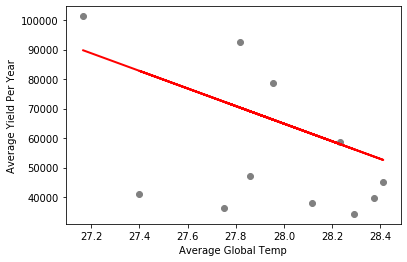

In [65]:

# They are fitting model and creating line
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Average Global Temp") 
plt.ylabel("Average Yield Per Year")
plt.show()

In [66]:
# VERY IMPORTANT, this helps us understand the performance of 
# the algorithim 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19409.3998383797
Mean Squared Error: 509071382.417042
Root Mean Squared Error: 22562.61027490042


In [ ]:
# Homework write a for loop that loops over all of the African Countires. 
# Does a linear Regression and makes a plot!